## Midterm Project
- Name: Haiting Huang 



- Brown ID: 140556419 



- Date: 2022.10.12


In [4]:
# Check Environment
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)



[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.
[ OK ] xgboost version 1.5.1 is installed.
[ OK ] shap version 0.40.0 is installed.


In [5]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
import math
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

### Exploratory Data Analysis

- Read and view the general data

In [6]:

df = pd.read_csv('/Users/huanghaiting/Desktop/Brown/Data1030/DATA1030-Fall2022/Midterm /data/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


-  dataframe general information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [8]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [10]:
df.shape

(7385, 12)

In [11]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [12]:
df.shape # check the variables in row and col

(7385, 12)

In [13]:
df.columns # easily to see the col names

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [14]:
# know the range
df['CO2 Emissions(g/km)'].describe()

count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2 Emissions(g/km), dtype: float64

In [15]:
# For knowing the variables' name with its type in a easy way

var_col = []
num_col = []
for i in df.columns:
    if df[i].dtype == object:
        var_col.append(i)
    elif df[i].dtype != object:
        num_col.append(i)
print("Categorical features: ", var_col )
print("Numerical features: ", num_col )

Categorical features:  ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
Numerical features:  ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


In [16]:
df.describe(exclude='number')

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


In [17]:
df.duplicated().sum()# unique

1103

In [18]:
df[df.duplicated() == True]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [19]:
df.drop_duplicates(keep='first', inplace = True)# delete the duplicate

In [20]:
df.shape

(6282, 12)

In [21]:
df.duplicated().sum()# unique

0

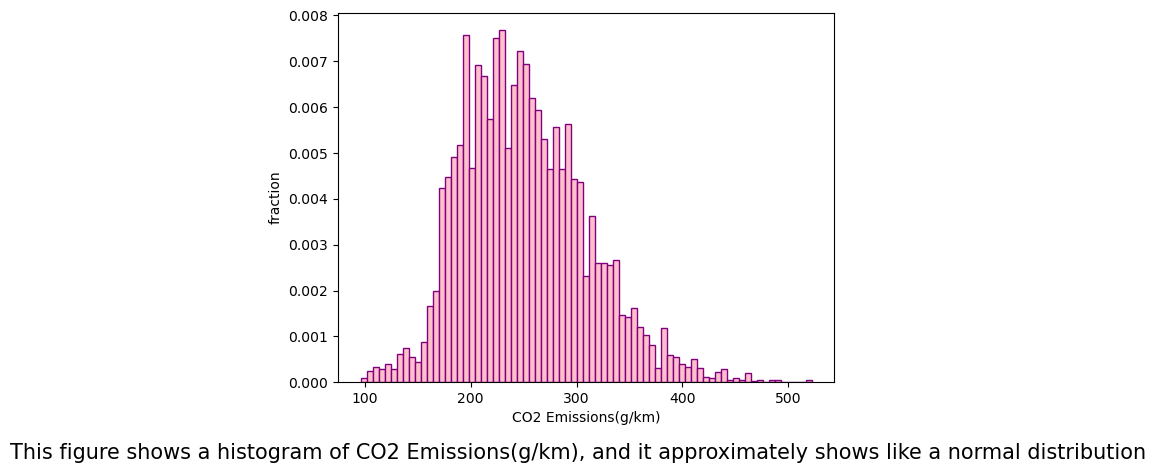

In [22]:
df['CO2 Emissions(g/km)'].plot.hist(bins = 75, edgecolor = 'Purple', color = 'Pink', density = True)  
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('fraction')
# caption
plt.figtext(0.5, -0.05, 'This figure shows a histogram of CO2 Emissions(g/km), and it approximately shows like a normal distribution', wrap=True, horizontalalignment='center', fontsize=15)
plt.savefig('corr.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

<Figure size 1500x1000 with 0 Axes>

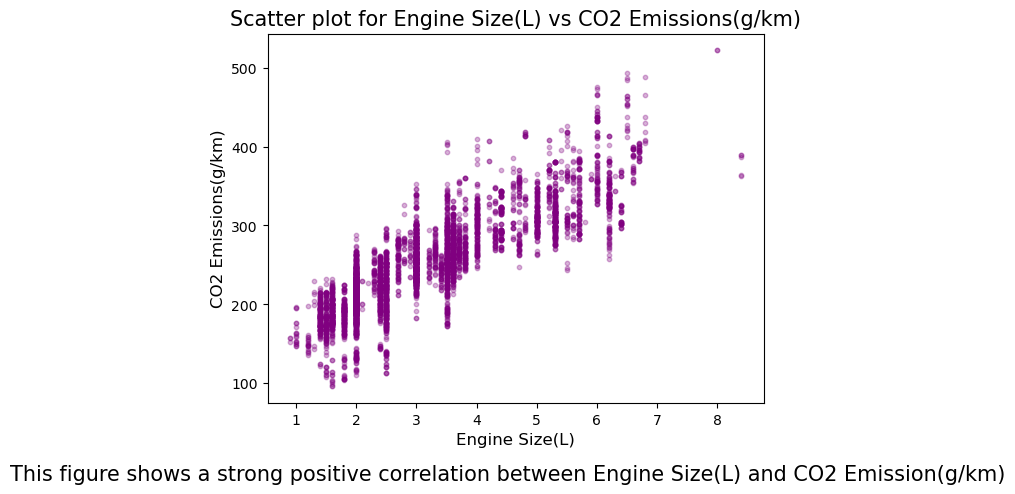

In [23]:
# engine size vs Co2 emission num vs num
plt.figure(figsize=(15,10))
df.plot.scatter('Engine Size(L)','CO2 Emissions(g/km)', s=10, alpha=0.3, color = 'Purple') # alpha=0.1,s=10
plt.xlabel('Engine Size(L)', fontsize = 12)
plt.ylabel('CO2 Emissions(g/km)', fontsize = 12)
plt.figtext(0.5, -0.05, 'This figure shows a strong positive correlation between Engine Size(L) and CO2 Emission(g/km)', wrap=True, horizontalalignment='center', fontsize=15)
plt.title('Scatter plot for Engine Size(L) vs CO2 Emissions(g/km)', fontsize = 15)
plt.savefig('corr2.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

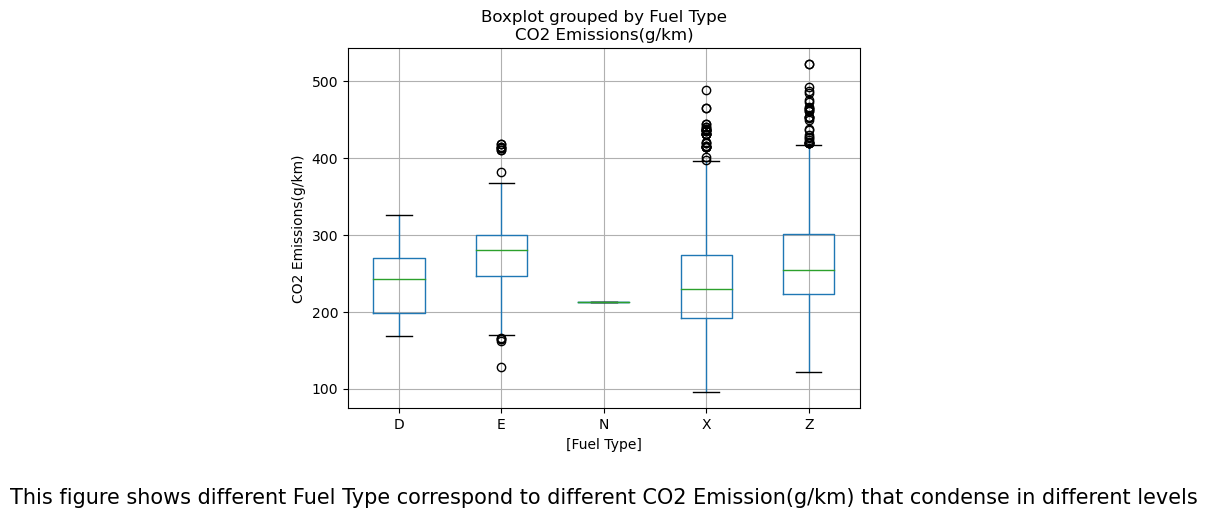

In [24]:
# num vs cat, emission vs fueltype
df[['CO2 Emissions(g/km)','Fuel Type']].boxplot(by='Fuel Type')
plt.ylabel('CO2 Emissions(g/km)')
plt.figtext(0.5, -0.05, 'This figure shows different Fuel Type correspond to different CO2 Emission(g/km) that condense in different levels', wrap=True, horizontalalignment='center', fontsize=15)
plt.savefig('corr3.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

<Figure size 500x300 with 0 Axes>

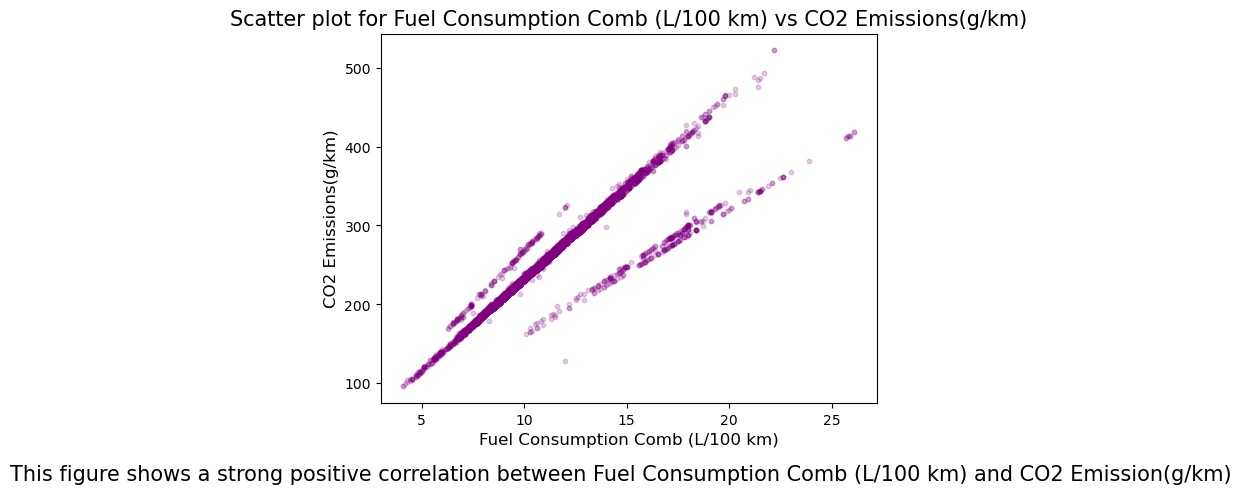

In [25]:
#Fuel Consumption Comb (L/100 km) vs Co2 emission num vs num
plt.figure(figsize=(5,3))
df.plot.scatter('Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)',s=10,alpha=0.2, color = 'Purple') # alpha=0.1,s=10
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize = 12)
plt.ylabel('CO2 Emissions(g/km)', fontsize = 12)
plt.title('Scatter plot for Fuel Consumption Comb (L/100 km) vs CO2 Emissions(g/km)', fontsize = 15)
plt.figtext(0.5, -0.05, 'This figure shows a strong positive correlation between Fuel Consumption Comb (L/100 km) and CO2 Emission(g/km)', wrap=True, horizontalalignment='center', fontsize=15)
plt.savefig('corr4.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

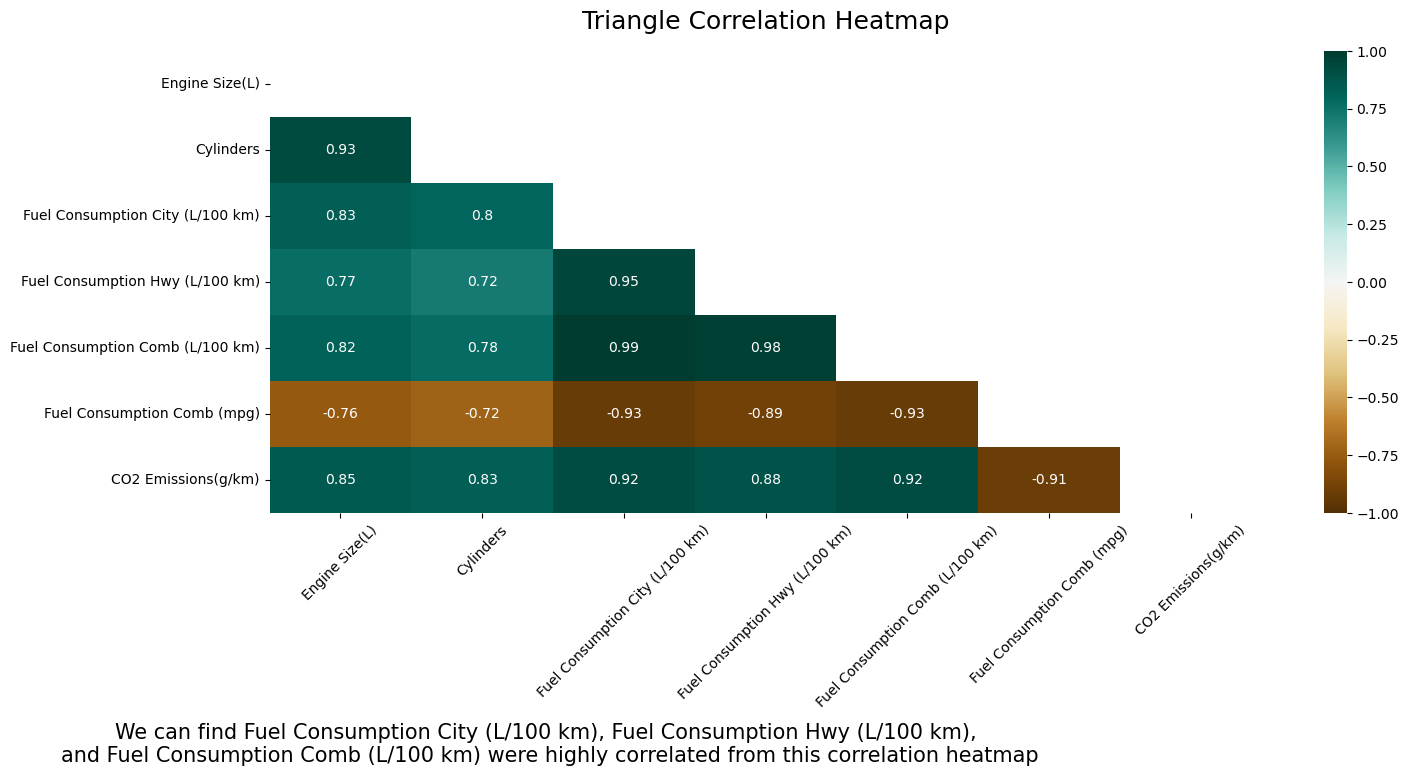

In [26]:
# use feature matrix calculate the Pearson correlation matrix and visualize the correlation matrix as heatmap
# resources: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
plt.figtext(0.3, -0.3, 'We can find Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), \nand Fuel Consumption Comb (L/100 km) were highly correlated from this correlation heatmap', wrap=True, horizontalalignment='center', fontsize=15)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.xticks(rotation = 45)
plt.savefig('corr5.png', format='png', bbox_inches="tight", dpi=300)

In [27]:
df.drop(['CO2 Emissions(g/km)'],axis=1, inplace=True)

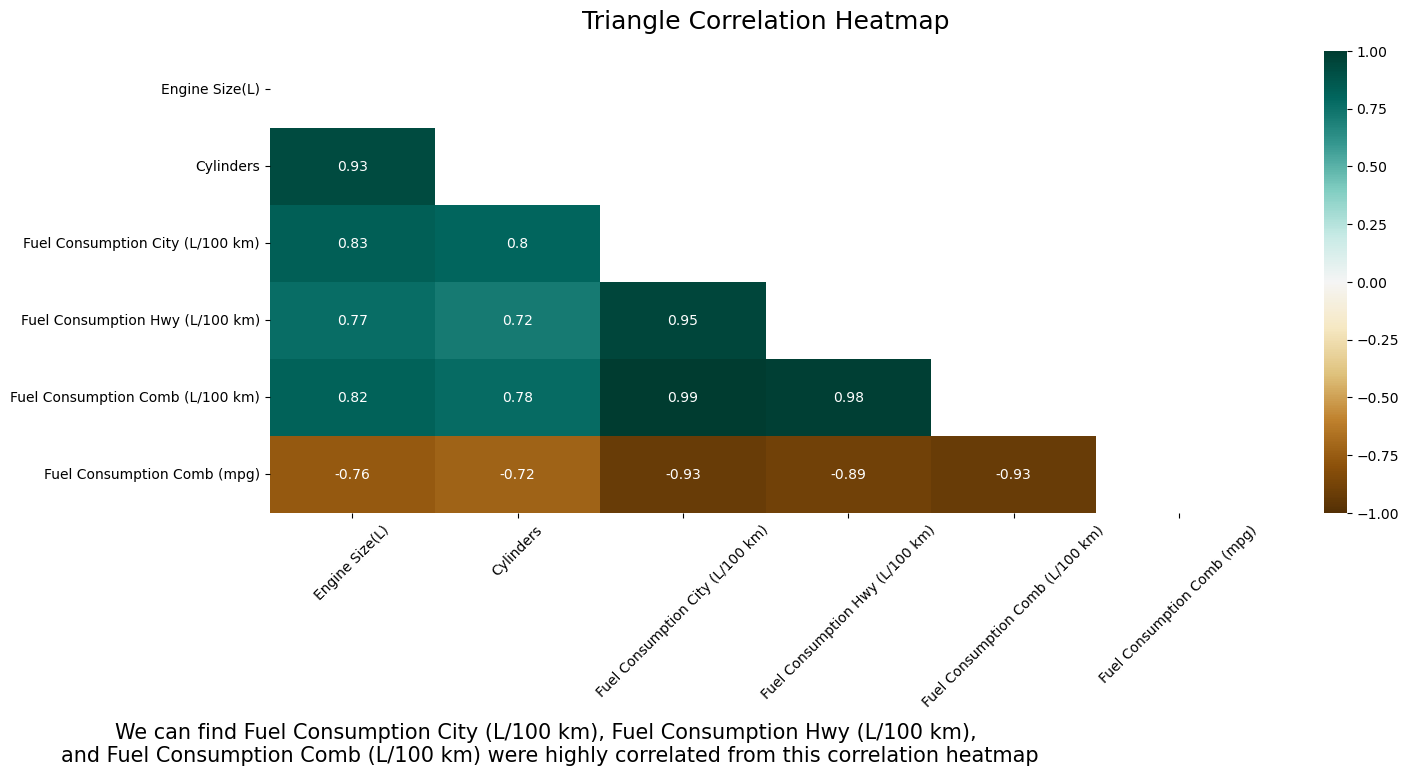

In [28]:

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
plt.figtext(0.3, -0.3, 'We can find Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), \nand Fuel Consumption Comb (L/100 km) were highly correlated from this correlation heatmap', wrap=True, horizontalalignment='center', fontsize=15)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.xticks(rotation=45)
plt.savefig('corr6.png', format='png', bbox_inches="tight", dpi=300)

In [29]:
df.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'],axis=1, inplace=True)

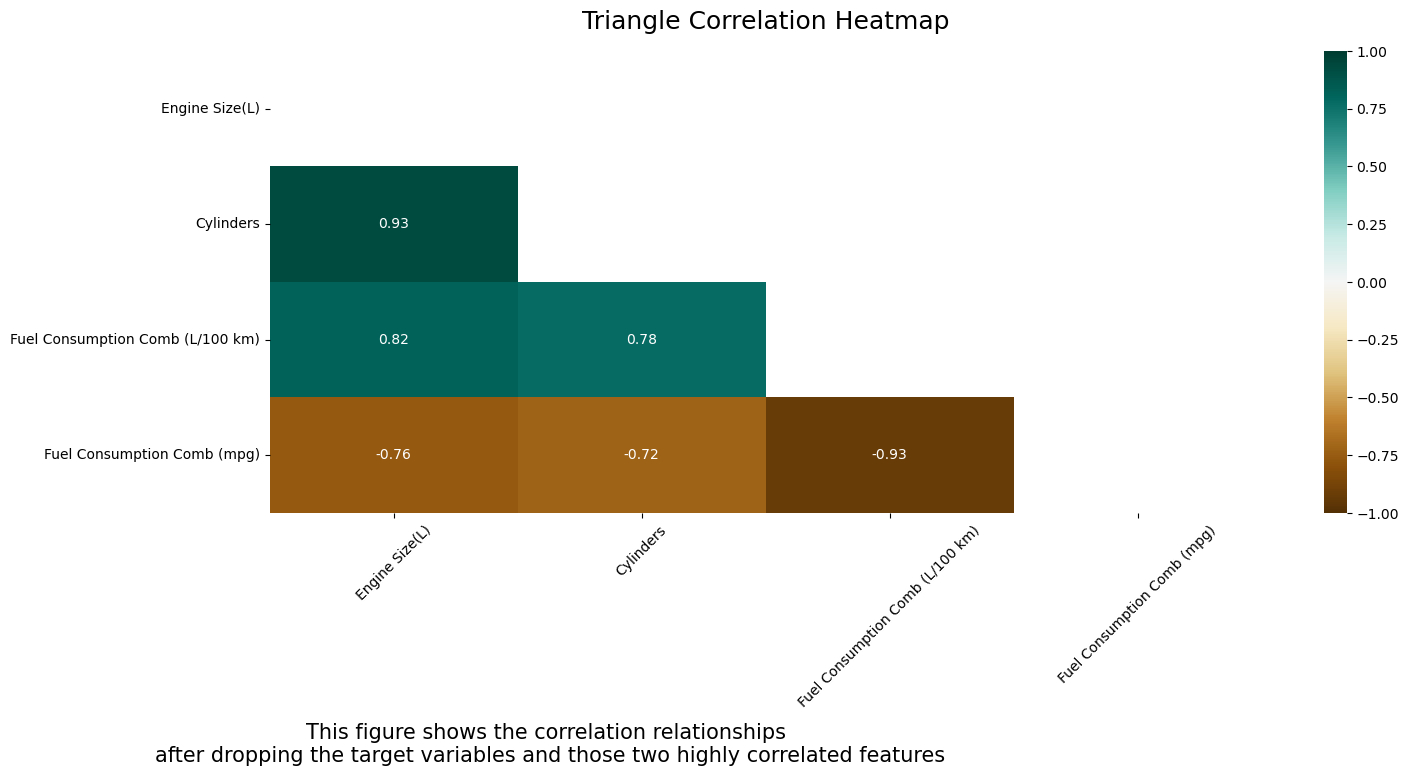

In [30]:
# use feature matrix calculate the Pearson correlation matrix and visualize the correlation matrix as heatmap
# resources: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
plt.figtext(0.3, -0.3, 'This figure shows the correlation relationships \nafter dropping the target variables and those two highly correlated features', wrap=True, horizontalalignment='center', fontsize=15)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.xticks(rotation=45)
plt.savefig('corr7.png', format='png', bbox_inches="tight", dpi=300)


In [33]:
df = pd.read_csv('/Users/huanghaiting/Desktop/Brown/Data1030/DATA1030-Fall2022/Midterm /data/CO2 Emissions_Canada.csv')
df.drop_duplicates(keep='first', inplace = True)# delete the duplicate
df.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'],axis=1, inplace=True)

### Split


In [34]:

y = df['CO2 Emissions(g/km)'] 
X = df.loc[:, df.columns != 'CO2 Emissions(g/km)'] # all other columns are features
print(y)
print(X.head())

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 6282, dtype: int64
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  
0         Z                               8.5                           33  
1         Z                               9.6                           29  
2         Z                               5.9                           48  
3         Z                          

In [35]:
random_state =42

# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print('Other set:',X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 
    # the validation set contains different points in each iteration
    print(X_val[['Fuel Type','Fuel Consumption Comb (L/100 km)','Engine Size(L)']].head())

Other set: (5025, 9) (5025,)
test set: (1257, 9) (1257,)
   training set: (4020, 9) (4020,)
   validation set: (1005, 9) (1005,)
     Fuel Type  Fuel Consumption Comb (L/100 km)  Engine Size(L)
1399         X                              11.5             3.6
4015         X                               7.6             2.0
3287         X                              10.3             2.5
5751         E                              17.3             3.5
1218         Z                              10.4             3.0
   training set: (4020, 9) (4020,)
   validation set: (1005, 9) (1005,)
     Fuel Type  Fuel Consumption Comb (L/100 km)  Engine Size(L)
6622         Z                               9.2             2.0
5035         Z                               9.8             2.0
6486         X                               8.1             2.0
605          X                               8.4             2.0
1209         Z                               8.7             3.0
   training set: (4

In [36]:
X_val.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'],
      dtype='object')

### Preprocess

In [37]:
# after frop
# let's separate the feature matrix X, and target variable y
y = df['CO2 Emissions(g/km)'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'CO2 Emissions(g/km)'] # all other columns are features

random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)


In [38]:
onehot_ftrs = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
std_ftrs = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(X_val_prep.shape)
print(X_test_prep.shape)

features_name = preprocessor.get_feature_names_out()
print('Features name', features_name)


(3769, 9)
(3769, 1768)
[[ 0.          0.          0.         ...  1.34294647  0.77225154
  -0.91369289]
 [ 0.          0.          0.         ... -0.85964938 -0.80706735
   0.76194177]
 [ 0.          0.          0.         ...  0.24164855  0.7035855
  -0.77405667]
 ...
 [ 0.          0.          0.         ... -0.85964938 -0.77273433
   0.62230555]
 [ 0.          0.          0.         ... -0.85964938 -1.01306547
   1.04121421]
 [ 0.          0.          0.         ... -0.85964938 -0.80706735
   0.76194177]]
(1256, 1768)
(1257, 1768)
Features name ['onehot__Make_ACURA' 'onehot__Make_ALFA ROMEO'
 'onehot__Make_ASTON MARTIN' ... 'std__Cylinders'
 'std__Fuel Consumption Comb (L/100 km)'
 'std__Fuel Consumption Comb (mpg)']


In [39]:
df.shape

(6282, 10)